# Analyse Experimental Psychology Lab Sarah, Ginny, Emily

## Preparation: Imports and load Dataset

In [1]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [2]:
print(os.path.abspath("."))

C:\Users\sarah\Documents\XPLab_Conformity\Analyses\main


In [3]:

df = pd.read_csv(os.path.join("..","..","Data","main","results_281_Group8_Conformity_Pilot_Group8_final.csv"))


In [4]:
with pd.option_context('display.max_columns', 9999, 'display.max_rows', 10):
    display(df.head())

,submission_id,QUD,RT,age,comments,education,endTime,experiment_id,gender,id,languages,option1,option2,option3,option4,option5,optionLeft,optionRight,question,response,s1,s2,s3,s4,s5,startDate,startTime,text1,text2,timeSpent,trial_name,trial_number
0,3227,NaN,NaN,23.0,NaN,Graduated High School,1630871800614,281,male,s3,german,Animal Products,Protesting,Vaccine against Covid-19,Abortion,Political Orientation,NaN,NaN,Which out of these topics do you care about th...,Vaccine against Covid-19,NaN,NaN,NaN,NaN,NaN,Sun Sep 05 2021 20:56:23 GMT+0100 (Britische S...,1630871783689,NaN,NaN,0.282083,sentence_customized,1
1,3227,NaN,NaN,23.0,NaN,Graduated High School,1630871800614,281,male,NaN,german,NaN,NaN,NaN,NaN,NaN,Strongly Disagree,Strongly Agree,NaN,+5,People should not buy or eat animal products,It is alright if political protesters use viol...,Everybody who is medically suited to receive a...,Abortion should be illegal,I am politically oriented towards the left,Sun Sep 05 2021 20:56:23 GMT+0100 (Britische S...,1630871783689,NaN,NaN,0.282083,rating_choice,1
2,3227,NaN,NaN,23.0,NaN,Graduated High School,1630871800614,281,male,6,german,NaN,NaN,NaN,NaN,NaN,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,+3,NaN,NaN,NaN,NaN,NaN,Sun Sep 05 2021 20:56:23 GMT+0100 (Britische S...,1630871783689,<br/><br/>Approximately 60% of the other part...,Imagine you have witnessed someone rob a bank....,0.282083,moral_dilemma_2A,1
3,3227,NaN,NaN,23.0,NaN,Graduated High School,1630871800614,281,male,s1,german,Participants chose which action they preferred.,"Due to a computer error, participants were not...",No data was saved during the experiment.,The participants completed the experiment with...,I don't understand what is happening here.,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN,NaN,NaN,NaN,NaN,Sun Sep 05 2021 20:56:23 GMT+0100 (Britische S...,1630871783689,NaN,NaN,0.282083,understanding_choice,1
4,3227,NaN,5455.0,23.0,NaN,Graduated High School,1630871800614,281,male,NaN,german,NaN,NaN,NaN,NaN,NaN,happy,sad,How do you feel about your choice?,3,NaN,NaN,NaN,NaN,NaN,Sun Sep 05 2021 20:56:23 GMT+0100 (Britische S...,1630871783689,NaN,NaN,0.282083,emotions_fake,1


## Clean Dataset

* remove superflous columns and rows
* make cleaner format (one row per participant, ...)

In [5]:
df = df.drop(columns=["QUD","RT", "age", "comments", "education", "endTime", "experiment_id", "gender", "id", "languages", "startDate", "startTime", "text2", "timeSpent", "trial_name",  "trial_number"])
df.head()

,submission_id,option1,option2,option3,option4,option5,optionLeft,optionRight,question,response,s1,s2,s3,s4,s5,text1
0,3227,Animal Products,Protesting,Vaccine against Covid-19,Abortion,Political Orientation,NaN,NaN,Which out of these topics do you care about th...,Vaccine against Covid-19,NaN,NaN,NaN,NaN,NaN,NaN
1,3227,NaN,NaN,NaN,NaN,NaN,Strongly Disagree,Strongly Agree,NaN,+5,People should not buy or eat animal products,It is alright if political protesters use viol...,Everybody who is medically suited to receive a...,Abortion should be illegal,I am politically oriented towards the left,NaN
2,3227,NaN,NaN,NaN,NaN,NaN,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,+3,NaN,NaN,NaN,NaN,NaN,<br/><br/>Approximately 60% of the other part...
3,3227,Participants chose which action they preferred.,"Due to a computer error, participants were not...",No data was saved during the experiment.,The participants completed the experiment with...,I don't understand what is happening here.,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN,NaN,NaN,NaN,NaN,NaN
4,3227,NaN,NaN,NaN,NaN,NaN,happy,sad,How do you feel about your choice?,3,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#for all participants, drop fifth row (irrelevant)
df = df.drop(index=df[df["question"] == "How do you feel about your choice?"].index)

In [7]:
# drop some other irrelevant columns
df = df.drop(columns=["option1", "option2", "option3", "option4", "option5", "s1", "s2", "s3", "s4", "s5"])
df.head()

,submission_id,optionLeft,optionRight,question,response,text1
0,3227,NaN,NaN,Which out of these topics do you care about th...,Vaccine against Covid-19,NaN
1,3227,Strongly Disagree,Strongly Agree,NaN,+5,NaN
2,3227,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,+3,<br/><br/>Approximately 60% of the other part...
3,3227,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN
5,3224,NaN,NaN,Which out of these topics do you care about th...,Vaccine against Covid-19,NaN


In [8]:
df.loc[df["question"].isna(), "question"] = "statement"
df.head()

,submission_id,optionLeft,optionRight,question,response,text1
0,3227,NaN,NaN,Which out of these topics do you care about th...,Vaccine against Covid-19,NaN
1,3227,Strongly Disagree,Strongly Agree,statement,+5,NaN
2,3227,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,+3,<br/><br/>Approximately 60% of the other part...
3,3227,NaN,NaN,"To ensure you understood the assignment, pleas...",Participants chose which action they preferred.,NaN
5,3224,NaN,NaN,Which out of these topics do you care about th...,Vaccine against Covid-19,NaN


In [9]:
#so now there's 4 rows per participant, and we'll in a next step use the .pivot()-method to create one row per participant. However what's left there 
#would be the text1-column which doesn't fit the scheme, so in a previous step we'll add a fifth row per participant where the response is text1, 
#and we'll remove the column text1. Note that text1 IS NO RESPONSE, but we'll behave like it is to not break pandas' .pivot() method.
text1_cols = df[~df["text1"].isna()][["submission_id", "text1"]].set_index("submission_id").rename(columns={"text1": "response"})
text1_cols["question"] = "text1"
text1_cols.head()

,response,question
submission_id,,
3227,<br/><br/>Approximately 60% of the other part...,text1
3224,<br/><br/>Approximately 60% of the other part...,text1
3215,<br/><br/>Approximately 60% of the other part...,text1
3201,<br/><br/>Approximately 60% of the other part...,text1
3200,<br/><br/>60% of the other participants who a...,text1


In [10]:
df = df.set_index("submission_id").append(text1_cols).sort_index().reset_index().drop(columns="text1")
df.head()

,submission_id,optionLeft,optionRight,question,response
0,2727,NaN,NaN,text1,<br/><br/>Approximately 60% of the other part...
1,2727,NaN,NaN,"To ensure you understood the assignment, pleas...","Due to a computer error, participants were not..."
2,2727,NaN,NaN,Which out of these topics do you care about th...,Abortion
3,2727,Call the police and report the robbery.,"Nothing, and let the robber be on their way.",What do you do?,+3
4,2727,Strongly Disagree,Strongly Agree,statement,-3


In [34]:
tidy_df = df.pivot(index="submission_id", columns="question", values="response")
# make numbers to integers instead of characters such that we can work with them properly
tidy_df.loc[:,"What do you do?"] = tidy_df["What do you do?"].astype("int")
tidy_df.loc[:,"statement"] = tidy_df["statement"].astype("int")
display(tidy_df.head())
len(tidy_df)

question,"To ensure you understood the assignment, please click on which of the following statements is true.",What do you do?,Which out of these topics do you care about the most?,statement,text1
submission_id,,,,,
2727,"Due to a computer error, participants were not...",3,Abortion,-3,<br/><br/>Approximately 60% of the other part...
2729,Participants chose which action they preferred.,3,Political Orientation,4,<br/><br/>Approximately 60% of the other part...
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,<br/><br/>Approximately 60% of the other part...
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>Approximately 60% of the other part...
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>60% of the other participants who a...


72

## Exclude participants 

In [33]:
#exclude participants that failed the understanding question or/and were neutral towards their chosen topic
clean_df = tidy_df[(tidy_df["To ensure you understood the assignment, please click on which of the following statements is true."]=="Participants chose which action they preferred.") & ~(tidy_df["statement"]==0)]
print(len(clean_df))
# we had 72 participants before and now it is only 60 so we exluded 12 participants
clean_df.rename(columns = {'What do you do?':'preference'}, inplace = True)
clean_df.rename(columns = {'text1':'condition'}, inplace = True)
clean_df.head()

60
60


C:\Users\sarah\Miniconda3\envs\psylab\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


question,"To ensure you understood the assignment, please click on which of the following statements is true.",preference,Which out of these topics do you care about the most?,statement,condition
submission_id,,,,,
2729,Participants chose which action they preferred.,3,Political Orientation,4,<br/><br/>Approximately 60% of the other part...
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,<br/><br/>Approximately 60% of the other part...
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>Approximately 60% of the other part...
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,<br/><br/>60% of the other participants who a...
2733,Participants chose which action they preferred.,3,Abortion,-5,<br/><br/>Approximately 60% of the other part...


## Differentiate the different conditions

In [13]:
# show the whole text for the different conditions
with pd.option_context('display.max_colwidth', None):
    display(clean_df["condition"].head())

submission_id
2729     <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to let the robber go. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to report the robber.
2730     <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to report the robber. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to let the robber go.
2731     <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to let the robber go. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to report the robber.
2732                                                                                                                                                              <br/><br/>60% 

In [14]:
# differentiate between conditions

clean_df["only_ingroup_norm_show"] = clean_df["condition"].isin([" <br/><br/>60% of the other participants who agree with you on your chosen issue chose to report the robber.", " <br/><br/>Approximately 60% of the other participants who agree with you on your chosen issue chose to let the robber go."])
clean_df["let_go_norm_show"] = clean_df["condition"].isin([" <br/><br/>Approximately 60% of the other participants who agree with you on  your chosen issue chose to let the robber go. <br/><br/> Approximately 85% of participants in a previous study who disagreed with you on  your chosen issue chose to report the robber.", " <br/><br/>Approximately 60% of the other participants who agree with you on your chosen issue chose to let the robber go."])
clean_df = clean_df.drop(columns="condition")
clean_df.head()

C:\Users\sarah\AppData\Local\Temp/ipykernel_13276/1067831111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["only_ingroup_norm_show"] = clean_df["condition"].isin([" <br/><br/>60% of the other participants who agree with you on your chosen issue chose to report the robber.", " <br/><br/>Approximately 60% of the other participants who agree with you on your chosen issue chose to let the robber go."])
C:\Users\sarah\AppData\Local\Temp/ipykernel_13276/1067831111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

question,"To ensure you understood the assignment, please click on which of the following statements is true.",preference,Which out of these topics do you care about the most?,statement,only_ingroup_norm_show,let_go_norm_show
submission_id,,,,,,
2729,Participants chose which action they preferred.,3,Political Orientation,4,False,True
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,False,False
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,False,True
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,True,False
2733,Participants chose which action they preferred.,3,Abortion,-5,False,False


# Plotting 

In [15]:
# compute mean of choice for every condition
mean_ingroup = clean_df.groupby(["only_ingroup_norm_show", "let_go_norm_show"])["preference"].mean() 
display(pd.DataFrame(mean_ingroup))

preference
only_ingroup_norm_show let_go_norm_show            
False                  False               1.526316
                       True                1.812500
True                   False               1.818182
                       True                0.714286

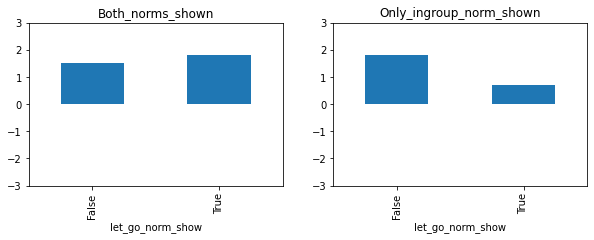

In [16]:
# plot means of choice for every condition with barplot which looks shitty
fig, ax = plt.subplots(1,2, figsize=(10,3))

mean_ingroup[False].plot.bar(title="Both_norms_shown", ax=ax[0], ylim=[-3,3])
mean_ingroup[True].plot.bar(title="Only_ingroup_norm_shown", ax=ax[1], ylim=[-3,3]);

In [17]:
tmp = pd.DataFrame(mean_ingroup).reset_index()
tmp

,only_ingroup_norm_show,let_go_norm_show,preference
0,False,False,1.526316
1,False,True,1.812500
2,True,False,1.818182
3,True,True,0.714286


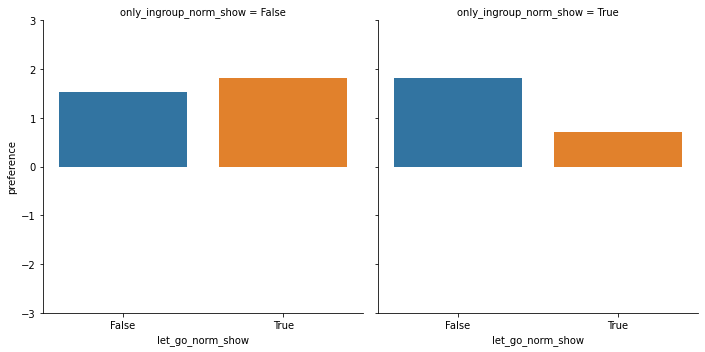

In [18]:
# try out seaborn barplot - somewhat better but not good still
sns.catplot(x="let_go_norm_show", y="preference", col="only_ingroup_norm_show", data=tmp, kind="bar").set(ylim=[-3,3])

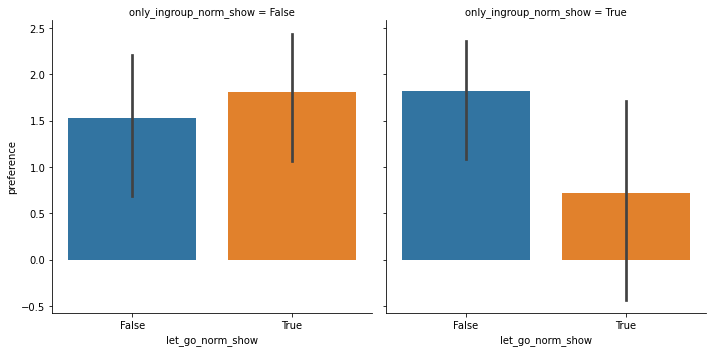

In [19]:
p = sns.catplot(x="let_go_norm_show", y="preference", col="only_ingroup_norm_show", data=clean_df, kind="bar")


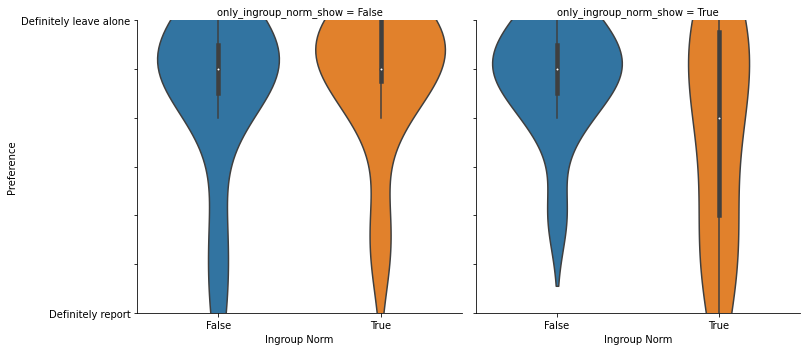

In [20]:
# try out seaborn violin plots instead
p = sns.catplot(x="let_go_norm_show", y="preference", col="only_ingroup_norm_show", data=clean_df, kind="violin").set(ylim=[-3,3])
p.set_axis_labels("Ingroup Norm", "Preference")
p.set_yticklabels(['Definitely report','','','','','','Definitely leave alone'])

Text(0.5, 1.0, 'Only Ingroup Norm ')

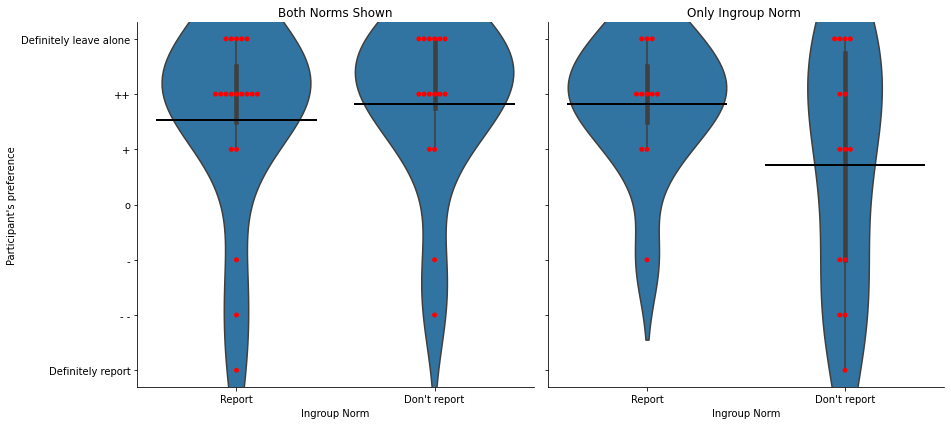

In [21]:
g = sns.FacetGrid(data=clean_df, col ='only_ingroup_norm_show', height=6).set(ylim=[-3,3])
# again we use a violinplot
g.map_dataframe(sns.violinplot, x="let_go_norm_show", y="preference")
# with a swarmplot on top for the individual answers
g.map_dataframe(sns.swarmplot, x="let_go_norm_show", y="preference", color="red")
# and show the mean as a black vertical line
g.map_dataframe(sns.boxplot, x="let_go_norm_show", y="preference", showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False,)
g.set_axis_labels("Ingroup Norm", "Participant's preference")
g.set_yticklabels(['Definitely report','- -','-','o','+','++','Definitely leave alone'])


g.set(ylim=(-3.3, 3.3))

g.set_xticklabels(['Report', 'Don\'t report'])


axes = g.axes.flatten()
axes[0].set_title("Both Norms Shown")
axes[1].set_title("Only Ingroup Norm ")

## Working on the dataset again: make the dataset look like the one from the study.

In [22]:
clean_df.head()

question,"To ensure you understood the assignment, please click on which of the following statements is true.",preference,Which out of these topics do you care about the most?,statement,only_ingroup_norm_show,let_go_norm_show
submission_id,,,,,,
2729,Participants chose which action they preferred.,3,Political Orientation,4,False,True
2730,Participants chose which action they preferred.,2,Vaccine against Covid-19,5,False,False
2731,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,False,True
2732,Participants chose which action they preferred.,2,Vaccine against Covid-19,4,True,False
2733,Participants chose which action they preferred.,3,Abortion,-5,False,False


In [23]:
assert len(set(clean_df["To ensure you understood the assignment, please click on which of the following statements is true."])) == 1
clean_df = clean_df.drop(columns=["To ensure you understood the assignment, please click on which of the following statements is true."])

In [24]:
# instead of a column that is true when only the ingroup norm is shown we make a column that is only true when both norms are shown like the authors did
clean_df["bothShown"] = ~clean_df["only_ingroup_norm_show"]
clean_df = clean_df.drop(columns=["only_ingroup_norm_show"])

In [25]:
clean_df.head(10)

question,preference,Which out of these topics do you care about the most?,statement,let_go_norm_show,bothShown
submission_id,,,,,
2729,3,Political Orientation,4,True,True
2730,2,Vaccine against Covid-19,5,False,True
2731,2,Vaccine against Covid-19,4,True,True
2732,2,Vaccine against Covid-19,4,False,False
2733,3,Abortion,-5,False,True
2734,3,Vaccine against Covid-19,5,False,False
2735,2,Vaccine against Covid-19,5,False,False
2737,2,Political Orientation,3,False,True
2738,1,Political Orientation,5,True,False


In [26]:
# make a column that is true when the answers of the participant equals the answer of the ingroup
clean_df["ingroupAgree"] = (clean_df["let_go_norm_show"] & (clean_df["preference"] > 0)) | (~clean_df["let_go_norm_show"] & (clean_df["preference"] < 0))

In [27]:
clean_df.head(10)

question,preference,Which out of these topics do you care about the most?,statement,let_go_norm_show,bothShown,ingroupAgree
submission_id,,,,,,
2729,3,Political Orientation,4,True,True,True
2730,2,Vaccine against Covid-19,5,False,True,False
2731,2,Vaccine against Covid-19,4,True,True,True
2732,2,Vaccine against Covid-19,4,False,False,False
2733,3,Abortion,-5,False,True,False
2734,3,Vaccine against Covid-19,5,False,False,False
2735,2,Vaccine against Covid-19,5,False,False,False
2737,2,Political Orientation,3,False,True,False
2738,1,Political Orientation,5,True,False,True


In [28]:

clean_df["outgroupDisagree"] = ~clean_df["ingroupAgree"]
clean_df["ingroupNorm"] = clean_df["let_go_norm_show"]
clean_df = clean_df.drop(columns="let_go_norm_show")
clean_df.head(10)

question,preference,Which out of these topics do you care about the most?,statement,bothShown,ingroupAgree,outgroupDisagree,ingroupNorm
submission_id,,,,,,,
2729,3,Political Orientation,4,True,True,False,True
2730,2,Vaccine against Covid-19,5,True,False,True,False
2731,2,Vaccine against Covid-19,4,True,True,False,True
2732,2,Vaccine against Covid-19,4,False,False,True,False
2733,3,Abortion,-5,True,False,True,False
2734,3,Vaccine against Covid-19,5,False,False,True,False
2735,2,Vaccine against Covid-19,5,False,False,True,False
2737,2,Political Orientation,3,True,False,True,False
2738,1,Political Orientation,5,False,True,False,True


In [32]:
#clean_df.to_csv(os.path.join(os.getcwd(),"df_for_modeling.csv"))
#a = os.path.isdir(os.path.dirname(os.path.abspath(os.path.join("..","..","Analyses","main","df_for_modeling.csv")))) == True
#print(a)
#clean_df.to_csv(os.path.join("..","..","Analyses","main","df_for_modeling.csv"))
#print(os.path.abspath(os.path.join("..","..","Analyses","main","df_for_modeling.csv")))

OSError: [Errno 22] Invalid argument: 'C:\\Users\\sarah\\Documents\\XPLab_Conformity\\Analyses\\main\\df_for_modeling.csv'

In [30]:
# save the prepared dataset to use it further for our model fitting
clean_df.to_csv("C:/Users/sarah/Documents/XPLab_Conformity/Analyses/main/df_for_modeling.csv")